In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

df = pd.read_csv('weather.csv')

df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['Ftemp'] = (df['Ktemp'] - 273.15) * (9/5) + 32

def plot_avg_temp(selected_year):
    df_filtered = df[df['year'] == selected_year]
    monthly_avg = df_filtered.groupby('month')['Ftemp'].mean()

    plt.figure(figsize=(10, 5))
    sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o')
    plt.xlabel("Month")
    plt.ylabel("Average Temperature (°F)")
    plt.title(f"Average Monthly Temperature for {selected_year}")
    plt.xticks(range(1, 13),
               ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid()
    plt.show()

slider = widgets.IntSlider(
    value=df['year'].min(),
    min=df['year'].min(),
    max=df['year'].max(),
    step=1,
    description="Year:"
)

output = widgets.Output()

def update_plot(change):
    with output:
        output.clear_output(wait=True)
        plot_avg_temp(slider.value)

slider.observe(update_plot, names='value')

display(slider, output)




IntSlider(value=1950, description='Year:', max=2021, min=1950)

Output()

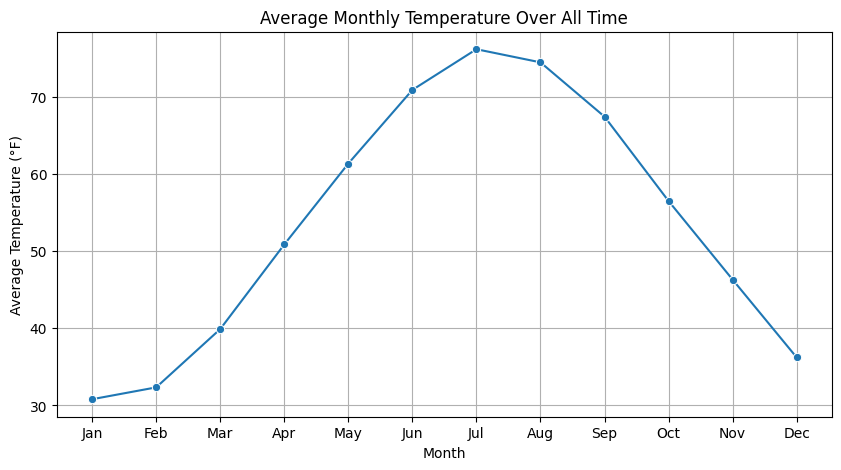

In [30]:
monthly_avg_all_time = df.groupby('month')['Ftemp'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_avg_all_time.index, y=monthly_avg_all_time.values, marker='o')
plt.xlabel("Month")
plt.ylabel("Average Temperature (°F)")
plt.title("Average Monthly Temperature Over All Time")
plt.xticks(range(1, 13),
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()

In [40]:
year = df.groupby('year')['Ftemp'].mean().reset_index()
pd.set_option('display.max_rows', None)
print(year)

    year      Ftemp
0   1950  52.776070
1   1951  53.822162
2   1952  54.372742
3   1953  55.295208
4   1954  53.463150
5   1955  53.596382
6   1956  52.687344
7   1957  54.043501
8   1958  51.603038
9   1959  54.059413
10  1960  51.990128
11  1961  52.206270
12  1962  51.400343
13  1963  51.784289
14  1964  52.622873
15  1965  52.075238
16  1966  52.663244
17  1967  51.378613
18  1968  52.516600
19  1969  52.835949
20  1970  52.762484
21  1971  53.563340
22  1972  52.550571
23  1973  54.595329
24  1974  53.544314
25  1975  54.455995
26  1976  52.378620
27  1977  52.999369
28  1978  51.512315
29  1979  53.171792
30  1980  52.773591
31  1981  52.989914
32  1982  52.866569
33  1983  53.525039
34  1984  53.464880
35  1985  53.859955
36  1986  53.593089
37  1987  53.580625
38  1988  53.003395
39  1989  52.962079
40  1990  55.598589
41  1991  55.555546
42  1992  52.545168
43  1993  53.981405
44  1994  53.874545
45  1995  54.101552
46  1996  52.664015
47  1997  53.387761
48  1998  56.114906


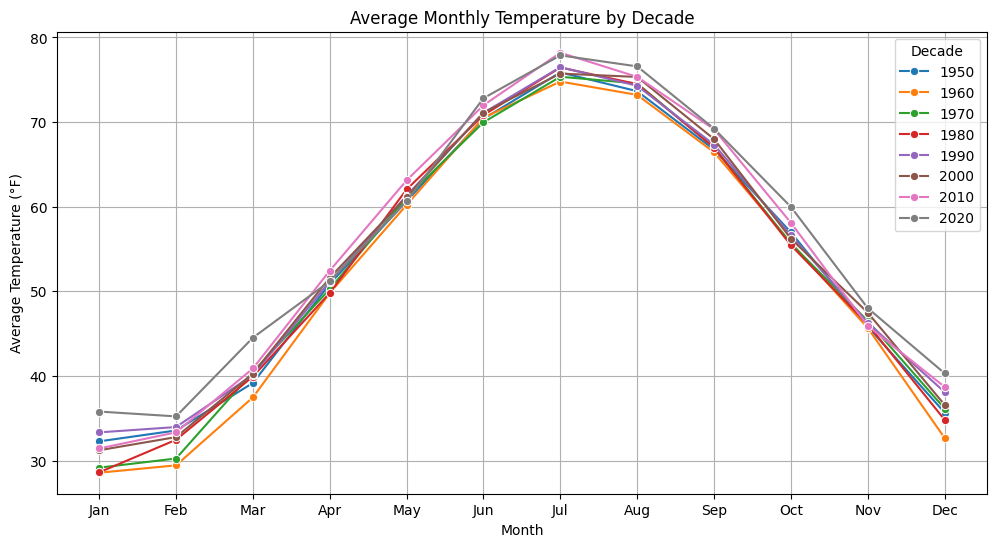

<ipython-input-32-be40e402a657>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


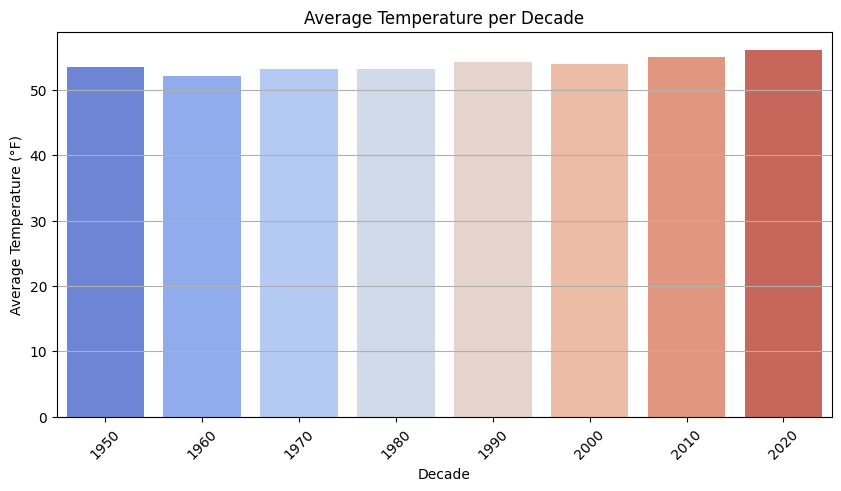

In [32]:
df['decade'] = (df['year'] // 10) * 10



plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df.groupby(['decade', 'month'])['Ftemp'].mean().reset_index(),
    x='month', y='Ftemp', hue='decade', palette='tab10', marker='o'
)
plt.xlabel("Month")
plt.ylabel("Average Temperature (°F)")
plt.title("Average Monthly Temperature by Decade")
plt.xticks(range(1, 13),
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title="Decade")
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(
    data=df.groupby('decade')['Ftemp'].mean().reset_index(),
    x='decade', y='Ftemp', palette='coolwarm'
)
plt.xlabel("Decade")
plt.ylabel("Average Temperature (°F)")
plt.title("Average Temperature per Decade")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


<ipython-input-36-cb2621377177>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="season", y="Ftemp", palette="coolwarm")


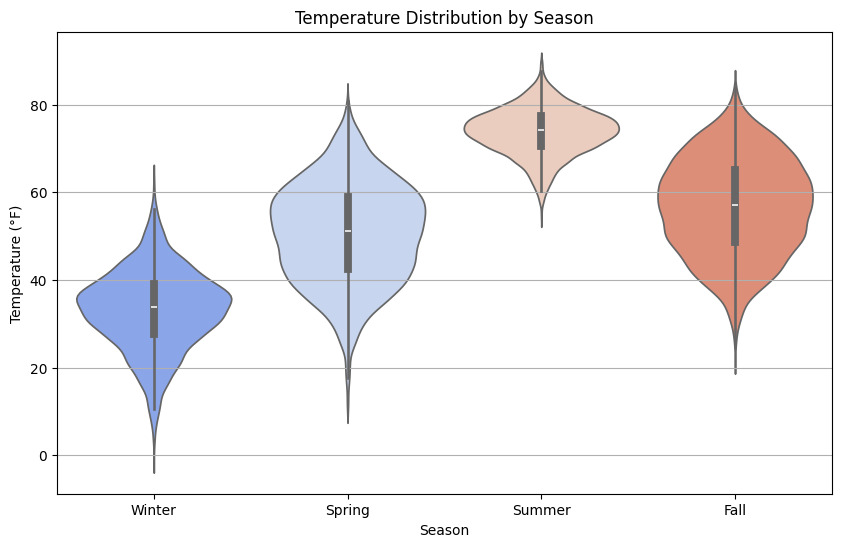

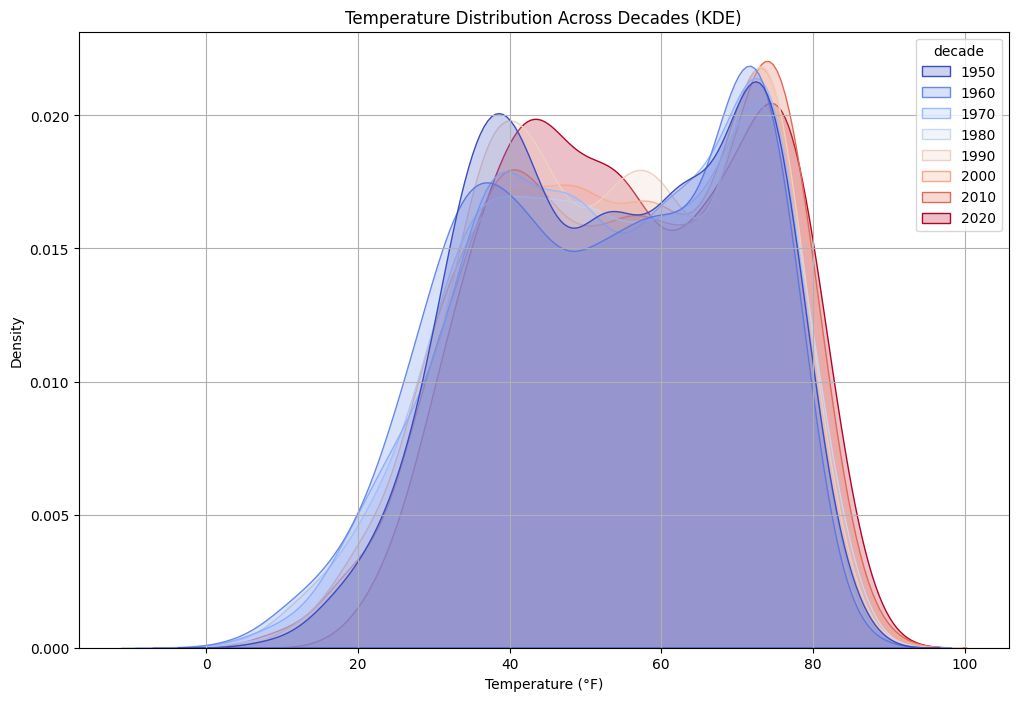

In [36]:
seasons = {
    "Winter": [12, 1, 2],
    "Spring": [3, 4, 5],
    "Summer": [6, 7, 8],
    "Fall": [9, 10, 11]
}
df["season"] = df["month"].map(lambda m: next((s for s, months in seasons.items() if m in months), None))

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="season", y="Ftemp", palette="coolwarm")
plt.xlabel("Season")
plt.ylabel("Temperature (°F)")
plt.title("Temperature Distribution by Season")
plt.grid(axis="y")
plt.show()


df_sorted = df.sort_values(by="decade")

plt.figure(figsize=(12, 8))
sns.kdeplot(
    data=df_sorted, x="Ftemp", hue="decade", fill=True, common_norm=False, palette="coolwarm"
)
plt.xlabel("Temperature (°F)")
plt.ylabel("Density")
plt.title("Temperature Distribution Across Decades (KDE)")
plt.grid()
plt.show()


Overall temperature increase (first to last decade): 2.5397512004770704
Average temperature delta per decade: 0.3628216000681529
Max temperature increase in a decade: 1.1146167311451904
Min temperature increase in a decade: -1.4243353222243087


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


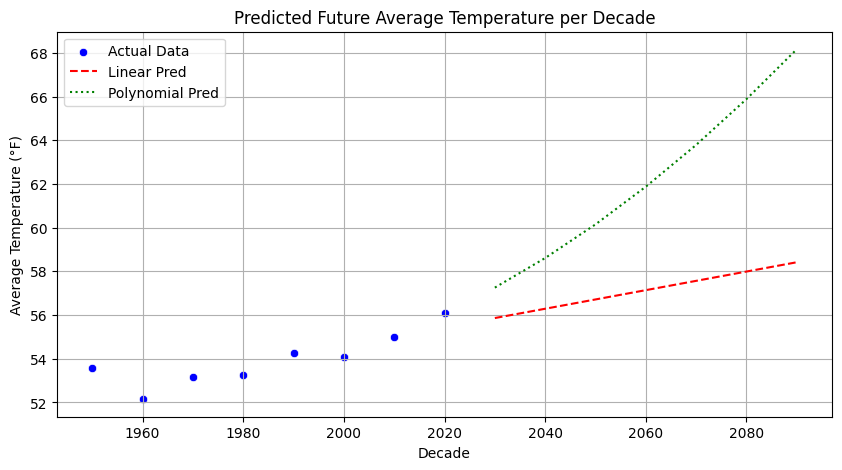

Linear Regression R² Score: 0.7326524788744002
Polynomial Regression R² Score: 0.87209698685391


In [35]:
decade_avg = df.groupby('decade')['Ftemp'].mean().reset_index()
decade_avg['Temp_Change'] = decade_avg['Ftemp'].diff()
decade_avg['Rate_of_Change'] = decade_avg['Temp_Change'] / 10

print("Overall temperature increase (first to last decade):",
      decade_avg['Ftemp'].iloc[-1] - decade_avg['Ftemp'].iloc[0])
print("Average temperature delta per decade:",
      decade_avg['Temp_Change'].mean())
print("Max temperature increase in a decade:",
      decade_avg['Temp_Change'].max())
print("Min temperature increase in a decade:",
      decade_avg['Temp_Change'].min())

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = decade_avg[['decade']]
y = decade_avg['Ftemp']

lin_reg = LinearRegression()
lin_reg.fit(X, y)

future_decades = np.array(range(decade_avg['decade'].max() + 10, 2100, 10)).reshape(-1, 1)
future_predictions = lin_reg.predict(future_decades)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

future_X_poly = poly.transform(future_decades)
future_poly_predictions = poly_reg.predict(future_X_poly)

plt.figure(figsize=(10, 5))

# Plot actual data
sns.scatterplot(x=decade_avg['decade'], y=decade_avg['Ftemp'], label="Actual Data", color='blue')
plt.plot(future_decades, future_predictions, label="Linear Pred", linestyle='dashed', color='red')
plt.plot(future_decades, future_poly_predictions, label="Polynomial Pred", linestyle='dotted', color='green')

# Formatting
plt.xlabel("Decade")
plt.ylabel("Average Temperature (°F)")
plt.title("Predicted Future Average Temperature per Decade")
plt.legend()
plt.grid()

plt.show()

print("Linear Regression R² Score:", lin_reg.score(X, y))
print("Polynomial Regression R² Score:", poly_reg.score(X_poly, y))

